In [110]:
import os
from glob import glob as lsdir
import numpy as np
import pandas as pd
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import nibabel as nib
from nilearn import plotting
import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection
import pingouin as pg

In [111]:
from nilearn.maskers import NiftiSpheresMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import image
from os import listdir, makedirs
from os.path import isfile, join, exists
import time

In [112]:
from nilearn import image 
from nilearn.plotting import plot_roi
from nilearn.masking import apply_mask
from nilearn.maskers import NiftiMapsMasker


# Defining Mask

## Cognitive_ToM

for plotting, you should install:

In [113]:
#from nltools.data import Brain_Data, Design_Matrix, Adjacency
#from nltools.mask import expand_mask, roi_to_brain

In [4]:
Cognitive_mask = nib.load("/imaging/ssaljoughi/masks/Cognitive_ToM.nii")


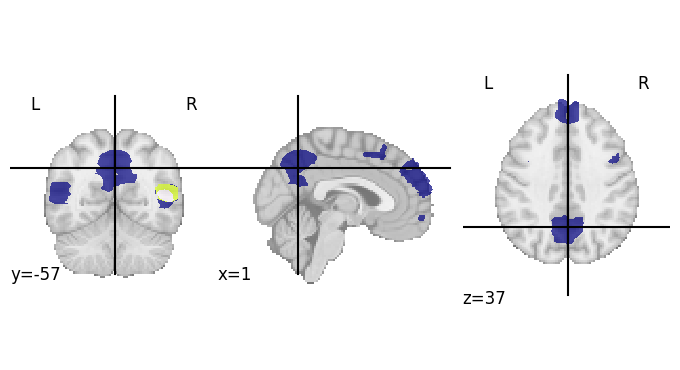

In [5]:
plot_roi(Cognitive_mask)

In [20]:
#path = "/imaging/ssaljoughi/masks/Cognitive"
path = "/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/Cognitive"
Cog_ROI = [folder for folder in listdir(path) if folder.endswith(".nii")]

In [21]:
Cog_masks = []
Cog_labels = []
i=0
for cluster in range(1,12):
    for ROI in Cog_ROI:
        str = ROI[-8:-4]
        new_str = str.replace("_cl","").replace("cl","")
        if int(new_str)==cluster:
            Cog_masks.append([nib.load(join("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/Cognitive",ROI)),cluster,ROI[:-8]])
            #visualization  = plot_roi(Cog_masks[i][0], title=f"cluster:{cluster} , ROI :{ROI[:-8]} ")
            #visualization.savefig(join("/imaging/ssaljoughi/masks/Cognitive/",f"{ROI[:-8]}.png"))
            Cog_labels.append(ROI[:-8])
            i = i+1
            
            

In [22]:
len(Cog_labels)

19

## Affective mask

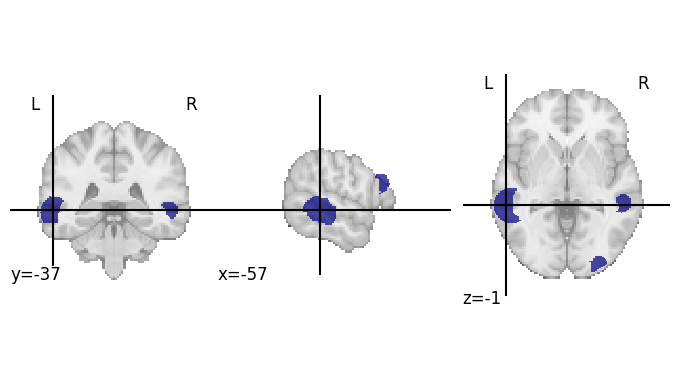

In [9]:
Aff_mask = nib.load("/imaging/ssaljoughi/masks/Affective_ToM.nii")
plot_roi(Aff_mask)

In [23]:
#path = "/imaging/ssaljoughi/masks/Affective"
path = "/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/Affective"
Aff_ROI = [folder for folder in listdir(path) if folder.endswith(".nii")]

In [24]:
Aff_masks = []
Aff_labels = []
i=0
for cluster in range(1,9):
    for ROI in Aff_ROI:
        str = ROI[-8:-4]
        new_str = str.replace("_cl","").replace("cl","")
        if int(new_str)==cluster:
            Aff_masks.append([nib.load(join("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/Affective/",ROI)),cluster,ROI[:-8]])
            #visualization  = plot_roi(Aff_masks[i][0], title=f"cluster:{cluster} , ROI :{ROI[:-8]} ")
            #visualization.savefig(join("/imaging/ssaljoughi/masks/Affective/",f"{ROI[:-8]}.png"))
            Aff_labels.append(ROI[:-8])
            i = i+1
            
            

## Empathy masks

In [25]:
#path = "/imaging/ssaljoughi/masks/empathy"
path = "/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/empathy"
Emp_ROI = [folder for folder in listdir(path) if folder.endswith(".nii")]

In [26]:
Emp_masks = []
Emp_labels = []
i=0
for cluster in range(1,10):
    for ROI in Emp_ROI:
        str = ROI[-8:-4]
        new_str = str.replace("_cl","").replace("cl","")
        if int(new_str)==cluster:
            Emp_masks.append([nib.load(join("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Data/masks/empathy/",ROI)),cluster,ROI[:-8]])
            #visualization  = plot_roi(Emp_masks[i][0], title=f"cluster:{cluster} , ROI :{ROI[:-8]} ")
            #visualization.savefig(join("/imaging/ssaljoughi/masks/empathy/",f"{ROI[:-8]}.png"))
            Emp_labels.append(ROI[:-8])
            i = i+1
            
            

## Resampling Masks

In [14]:
sample_path = "/imaging/wilson/MovieData/Release7/Age12/BioBank_Analysis_All/aamod_firstlevel_modelestimate_saveresids_00001/sub-NDARAN076TPG/swrsub-NDARAN076TPG_task-movieDM_bold_0275.nii"
sample_nifti = nib.load(sample_path)
resample_Cog_mask = []
for i in range(0,len(Cog_masks)):
    resample_Cog_mask.append(image.resample_to_img(Cog_masks[i][0], sample_nifti))
    



In [15]:
resample_Aff_mask = []
for i in range(0,len(Aff_masks)):
    resample_Aff_mask.append(image.resample_to_img(Aff_masks[i][0], sample_nifti))


In [16]:
resample_Emp_mask = []
for i in range(0,len(Emp_masks)):
    resample_Emp_mask.append(image.resample_to_img(Emp_masks[i][0], sample_nifti))

## Total mask

In [27]:
mask_T = Cog_masks+Aff_masks+Emp_masks

In [28]:
labels_T = Cog_labels+ Aff_labels+Emp_labels

### Coordinats for visualization

In [29]:
Cog_ToM_coords = [(-4,14,58),(2,56,28),(54,-54,20),(48,-70,8),(52,-54,24),(2,-56,34),(-50,-60,24),(-56,-10,-16),(-52,6,-28),(50,8,-30),(60,-10,-18),(56,26,6),(48,32,-2),(-6,50,-6),(-36,4,46),(-42,12,48),(-46,16,36),(-48,24,-10),(44,8,46)]
Aff_ToM_coords = [(-52,-38,-4),(-46,26,-10),(-50,18,24),(-4,16,56),(-6,58,24),(-8,56,36),(-4,-54,36),(8,-52,28),(58,24,16),(30,-94,-4),(52,-36,-2)]
Emp_coords = [(-54,8,20),(-30,22,6),(-56,10,24),(-38,26,-2),(-4,14,44),(8,12,52),(8,24,34),(6,12,62),(42,10,0),(52,30,0),(-58,-26,36),(62,-20,36),(-46,-68,-4),(48,-66,-2),(44,-60,-8),(-10,-12,8),(10,-18,10),(48,6,30),(54,10,18)]

In [30]:
All_coords = Cog_ToM_coords+Aff_ToM_coords+Emp_coords

# Importing Data

### list of subject

In [4]:
def get_sub(age_from,age_until):
    list_of_sub = []
    ''' list of subjects for the subjects we want.'''
    for age in range(age_from,age_until+1):
        #print("Processing age:", age)
        #input_path = f'/imaging/ssaljoughi/FC/Age{age}/'
        input_path = f'/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/FC/Age{age}'
        subjects = [folder for folder in listdir(input_path) if folder.startswith("sub") ]
        for subject in subjects:
            #print("Processing subject:", subject)
            list_of_sub.append(subject)
    return list_of_sub

In [5]:
list_of_sub = get_sub(5,18)
list_df = pd.DataFrame(list_of_sub)

In [6]:
list_df

0
0    sub-NDARDX910VTC
1    sub-NDARTZ018PD5
2    sub-NDARLH263KCL
3    sub-NDARBW262RV7
4    sub-NDARTN365HEV
..                ...
870  sub-NDAREL410HHK
871  sub-NDARMR039JV5
872  sub-NDARRK545WNM
873  sub-NDARRJ989YPA
874  sub-NDARBF851NH6

[875 rows x 1 columns]

### Importing FC(Functional Connectivity) file 

In [7]:
def link_fc2sub(list_of_sub):
    FCS = {}
    for sub in list_of_sub:
        for age in range(5,19):
            #print("Processing age:", age)
            #input_path = f'/imaging/ssaljoughi/FC/Age{age}/'
            input_path = f'/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/FC/Age{age}'
            subjects = [folder for folder in listdir(input_path) if folder.startswith("sub")]
            for subject in subjects:
                if(sub==subject):
                    print(sub,age)
                    subject_input_path = join(input_path, subject)
                    os.chdir(subject_input_path)
                    new_fc = np.load("FC.npy")
                    FCS[sub]=new_fc
    return FCS

In [8]:
FCS = link_fc2sub(list_of_sub)

sub-NDARDX910VTC 5
sub-NDARTZ018PD5 5
sub-NDARLH263KCL 5
sub-NDARBW262RV7 5
sub-NDARTN365HEV 5
sub-NDARPT777FDA 5
sub-NDARWG200CUE 5
sub-NDARTV776ZJ8 5
sub-NDARTH433TE0 5
sub-NDARCK815WZR 5
sub-NDARYZ906UHJ 5
sub-NDARRX552PP2 5
sub-NDARHT167JGL 5
sub-NDARHJ318KZA 5
sub-NDARFM645RH5 5
sub-NDARHP395DGY 5
sub-NDARAB514MAJ 5
sub-NDARPL240HZT 5
sub-NDARML626PGU 5
sub-NDARNT898ZPF 5
sub-NDARLY030ZBG 5
sub-NDARMF846EVR 5
sub-NDARWV938NKD 5
sub-NDARBM764KG0 5
sub-NDARJY645CRH 5
sub-NDARPK223WVZ 5
sub-NDARWE130JMG 6
sub-NDARNP423EJQ 6
sub-NDARYY670UC8 6
sub-NDARAG610XL4 6
sub-NDARXH270TJ8 6
sub-NDARPG874CMG 6
sub-NDARRM725BRV 6
sub-NDARYA851GL6 6
sub-NDARAN524ZK6 6
sub-NDARWE908KF8 6
sub-NDARFV725DEQ 6
sub-NDARMX482GWR 6
sub-NDARPK597XH0 6
sub-NDARTV107XD4 6
sub-NDARBX830ZD4 6
sub-NDARVZ086GL6 6
sub-NDARDP725ZVY 6
sub-NDAREW531JV9 6
sub-NDARUK054GTN 6
sub-NDARUN994RMC 6
sub-NDARDV204BYM 6
sub-NDARZV983XK9 6
sub-NDARFP148YDU 6
sub-NDARXF294ME0 6
sub-NDARUD394JAW 6
sub-NDARAB756JDJ 6
sub-NDAREV29

### Importing basic demos

In [9]:

import openpyxl 
#os.chdir("/imaging/ssaljoughi/Scripts")
os.chdir("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/datasets")
wb = pd.read_excel('data.xlsx',skiprows=[1],usecols='A, C,Q')
all_subject_list = []
j=0
for i in range(0,len(wb['Identifiers'])):
    wb['Identifiers'][i]=("sub-"+wb['Identifiers'][j][:-11])
    j=j+1

In [10]:
sub_list = [*FCS]
df_sum_list = pd.DataFrame(sub_list)

In [11]:
FCS2 = {}
## dictionary for age
FCS3 = {}
#dictionary for sex

In [12]:
for key in FCS:
    for i in range(0,len(wb['Identifiers'])):
        if (key==wb['Identifiers'][i]):
            FCS2[key]=[wb['Basic_Demos,Age'][i]]
            FCS3[key]=[wb['Basic_Demos,Sex'][i]]

In [13]:
#os.chdir("/imaging/Bria/Thesis Data")
os.chdir("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/datasets")
wb1 = pd.read_excel('2024.01.24 - Diagnosis Query.xlsx',skiprows=[1],usecols='A,B,N,AC,AR,BG,BV,CK,CZ,DO,ED,ES')

In [14]:
#changing subject id 
all_subject_list = []
j=0
for i in range(0,len(wb1['Identifiers'])):
    wb1['Identifiers'][i]=("sub-"+wb1['Identifiers'][j][:-11])
    j=j+1

In [15]:
# for ASD 
FCS4={}
# ASD = 1
FCS5 = {}
#ADHD = 2
# healthy = 0

In [16]:
for key in FCS:
    for i in range(0,len(wb1['Identifiers'])):
        if (key==wb1['Identifiers'][i]):
            word_ASD = "Autism Spectrum Disorder"
            word_ASD2 = "ASD"
            word_ADHD = "ADHD"
            if wb1.loc[i].str.contains(word_ASD).any() or wb1.loc[i].str.contains(word_ASD2).any():
                FCS4[key]= 1
            else:
                FCS4[key] = 0
            if wb1.loc[i].str.contains(word_ADHD).any():
                FCS5[key] = 1
            else:
                FCS5[key] = 0

In [17]:
ASD_count = 0
ADHD_count = 0
for i in range(0,len(wb1['Identifiers'])):
            word_ASD = "Autism Spectrum Disorder"
            word_ASD2 = "ASD"
            word_ADHD = "ADHD"
            if wb1.loc[i].str.contains(word_ASD).any() or wb1.loc[i].str.contains(word_ASD2).any():
                ASD_count = ASD_count+1
            elif wb1.loc[i].str.contains(word_ADHD).any():
                ADHD_count  = ADHD_count+1

In [85]:
data = pd.read_csv("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Scripts/Final Data/Final_dataP1.csv")
data = data.reset_index().rename(columns={'Unnamed: 0': 'Participant_ID'})
race_df = pd.read_csv("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/Papers/On the same wavelength/race.csv")
race_subset = race_df[['Identifiers', 'PreInt_Demos_Fam,Child_Ethnicity', 'PreInt_Demos_Fam,Child_Race']]
race_subset = race_subset.rename(columns={
    'Identifiers': 'Participant_ID',
    'PreInt_Demos_Fam,Child_Ethnicity': 'Child_Ethnicity',
    'PreInt_Demos_Fam,Child_Race': 'Child_Race'
})
j=0
for i in range(0,len(race_subset['Participant_ID'])):
    race_subset['Participant_ID'][i]=("sub-"+race_subset['Participant_ID'][j][:-11])
    j=j+1

# Creating DataFrame

In [114]:
def avr_fc():
    '''type: 
    within Cog_ToM  = wit_Cog
    within Aff_ToM = wit_Aff
    within Empathy = wit_Emp

    Between Cog_ToM and Aff_ToM = Bet_Cog_Aff
    Between Cog_ToM and Empathy = Bet_Cog_Emp
    Between Aff_ToM and Empathy = Bet_Aff_Emp

    '''
    data  = []
    mean_FC_value = []
    df = pd.DataFrame(data)
    for key in FCS4:#FCS4 is smaller than other FCS
        my_len = len(Cog_masks)
        mean_FC_value = FCS[key]
        mean_FC_wit_Cog = (mean_FC_value[0:len(Cog_masks),0:len(Cog_masks)]).mean()
        mean_FC_wit_Aff = (mean_FC_value[len(Cog_masks):len(Cog_masks)+len(Aff_masks),len(Cog_masks):len(Cog_masks)+len(Aff_masks)]).mean()
        mean_FC_wit_Emp = (mean_FC_value[len(Cog_masks)+len(Aff_masks):len(Cog_masks)+len(Aff_masks)+len(Emp_masks),len(Cog_masks)+len(Aff_masks):len(Cog_masks)+len(Aff_masks)+len(Emp_masks)]).mean()
        
        Bet_Cog_Aff = (mean_FC_value[len(Cog_masks):len(Cog_masks)+len(Aff_masks),0:len(Cog_masks)]).mean()
        Bet_Cog_Emp = (mean_FC_value[len(Cog_masks)+len(Aff_masks):len(Cog_masks)+len(Aff_masks)+len(Emp_masks),0:len(Cog_masks)]).mean()
        Bet_Aff_Emp = (mean_FC_value[len(Cog_masks):len(Cog_masks)+len(Aff_masks),len(Cog_masks)+len(Aff_masks):len(Cog_masks)+len(Emp_masks)+len(Aff_masks)]).mean()
        #Temporal_Cog = (mean_FC_value[4:10,4:10]).mean()
        #Total = (mean_FC_value[:,:]).mean()
        
        df[f'{key}'] = [FCS2[key][0],FCS3[key][0],FCS4[key],FCS5[key],mean_FC_wit_Cog,mean_FC_wit_Aff,mean_FC_wit_Emp,Bet_Cog_Aff,Bet_Cog_Emp,Bet_Aff_Emp]

    df = df.transpose()
    df = df.rename(columns = {0:"age",1:"sex",2: "Diagnosis ASD",3:"Diagnosis ADHD", 4:"within Cog_ToM ",5:"within Aff_ToM",6:"within Emp",7:"Between Cog and Aff",8:"Between Cog and Emp",9:"Between Aff and Emp"})
    df = df.sort_values('age')

    
    return df  

In [115]:
df = avr_fc()
df = df.reset_index().rename(columns={'index': 'Participant_ID'})
df = df.merge(race_subset, on='Participant_ID', how='left')
df

Participant_ID        age  sex  Diagnosis ASD  Diagnosis ADHD  \
0    sub-NDARAB514MAJ   5.055213  0.0            0.0             1.0   
1    sub-NDARRX552PP2   5.304928  0.0            0.0             1.0   
2    sub-NDARFM645RH5   5.312571  0.0            0.0             1.0   
3    sub-NDARPK223WVZ   5.337211  0.0            0.0             1.0   
4    sub-NDARTZ018PD5   5.337668  0.0            0.0             0.0   
..                ...        ...  ...            ...             ...   
851  sub-NDARVN920VHJ  20.781884  0.0            0.0             0.0   
852  sub-NDARKM784VA7  20.841775  1.0            0.0             0.0   
853  sub-NDARMR039JV5  20.998174  0.0            0.0             0.0   
854  sub-NDARHP841RMR  21.482318  1.0            1.0             1.0   
855  sub-NDARPN886HH9  21.899041  1.0            0.0             0.0   

     within Cog_ToM   within Aff_ToM  within Emp  Between Cog and Aff  \
0           0.228926        0.207736    0.169857             0.110955   
1           0.329402        0.261949    0.274800             0.232250   
2           0.366793        0.249721    0.266193             0.216240   
3           0.246127        0.166697    0.201471             0.111654   
4           0.142175        0.153236    0.170353             0.086134   
..               ...             ...         ...                  ...   
851         0.342045        0.181641    0.276510             0.177542   
852         0.344069        0.206886    0.284091             0.184298   
853         0.238629        0.224068    0.223653             0.160585   
854         0.085557        0.063883    0.118594             0.003526   
855         0.440582        0.309149    0.388126             0.286409   

     Between Cog and Emp  Between Aff and Emp  Child_Ethnicity  Child_Race  
0               0.109653             0.042181              0.0         0.0  
1               0.209536             0.147110              0.0         0.0  
2               0.196090             0.106777              0.0         0.0  
3               0.091631             0.011912              0.0         0.0  
4               0.047205             0.052277              0.0         0.0  
..                   ...                  ...              ...         ...  
851             0.159679             0.108723              NaN         NaN  
852             0.190790             0.094584              NaN         NaN  
853             0.095934             0.039020              NaN         NaN  
854             0.047766             0.022149              3.0         8.0  
855             0.365945             0.223294              2.0         1.0  

[856 rows x 13 columns]

In [109]:
print(df['Child_Ethnicity'].value_counts())
print(df['Child_Race'].value_counts())

Child_Ethnicity
0.0    532
1.0    206
2.0     51
3.0      5
Name: count, dtype: int64
Child_Race
0.0     415
8.0     128
1.0     113
2.0      95
3.0      23
9.0      12
10.0      5
11.0      3
4.0       3
5.0       1
Name: count, dtype: int64


### Importing Motion Data


In [117]:
df_cleaned = pd.read_csv("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Scripts/Final Data/Final_dataP1.csv")
df_cleaned['Unnamed: 0'] = df_cleaned['Unnamed: 0'].str.strip()
df_cleaned = df_cleaned.set_index('Unnamed: 0')
df_cleaned

age  sex  Diagnosis ASD  Diagnosis ADHD  \
Unnamed: 0                                                        
sub-NDARAB514MAJ   5.055213  0.0            0.0             1.0   
sub-NDARRX552PP2   5.304928  0.0            0.0             1.0   
sub-NDARFM645RH5   5.312571  0.0            0.0             1.0   
sub-NDARPK223WVZ   5.337211  0.0            0.0             1.0   
sub-NDARTZ018PD5   5.337668  0.0            0.0             0.0   
...                     ...  ...            ...             ...   
sub-NDARGA056TMW  15.300250  0.0            0.0             0.0   
sub-NDARTW855BPJ  15.316678  1.0            1.0             0.0   
sub-NDARXK986EK6  15.319872  0.0            1.0             1.0   
sub-NDARZE963MEU  15.328199  1.0            0.0             0.0   
sub-NDARTW850GHU  15.336413  0.0            0.0             0.0   

                  within Cog_ToM   within Aff_ToM  within Emp  \
Unnamed: 0                                                      
sub-NDARAB514MAJ         0.228926        0.207736    0.169857   
sub-NDARRX552PP2         0.329402        0.261949    0.274800   
sub-NDARFM645RH5         0.366793        0.249721    0.266193   
sub-NDARPK223WVZ         0.246127        0.166697    0.201471   
sub-NDARTZ018PD5         0.142175        0.153236    0.170353   
...                           ...             ...         ...   
sub-NDARGA056TMW         0.197832        0.163341    0.221985   
sub-NDARTW855BPJ         0.213138        0.238654    0.239621   
sub-NDARXK986EK6         0.255349        0.223296    0.244463   
sub-NDARZE963MEU         0.205232        0.267317    0.198776   
sub-NDARTW850GHU         0.262911        0.367294    0.191903   

                  Between Cog and Aff  Between Cog and Emp  \
Unnamed: 0                                                   
sub-NDARAB514MAJ             0.110955             0.109653   
sub-NDARRX552PP2             0.232250             0.209536   
sub-NDARFM645RH5             0.216240             0.196090   
sub-NDARPK223WVZ             0.111654             0.091631   
sub-NDARTZ018PD5             0.086134             0.047205   
...                               ...                  ...   
sub-NDARGA056TMW             0.103018             0.090932   
sub-NDARTW855BPJ             0.133990             0.136875   
sub-NDARXK986EK6             0.142611             0.183357   
sub-NDARZE963MEU             0.149490             0.061360   
sub-NDARTW850GHU             0.244480             0.073682   

                  Between Aff and Emp   mean_fd  
Unnamed: 0                                       
sub-NDARAB514MAJ             0.042181  0.237266  
sub-NDARRX552PP2             0.147110  0.336794  
sub-NDARFM645RH5             0.106777  0.327985  
sub-NDARPK223WVZ             0.011912  0.302791  
sub-NDARTZ018PD5             0.052277  0.272098  
...                               ...       ...  
sub-NDARGA056TMW             0.019769  0.446667  
sub-NDARTW855BPJ             0.051232  0.166220  
sub-NDARXK986EK6             0.119550  0.244081  
sub-NDARZE963MEU             0.014004  0.193573  
sub-NDARTW850GHU             0.063577  0.066583  

[753 rows x 11 columns]

# Inter-region correlation analysis

In [118]:
def avr_gp_based_sex(age_from,age_until,sex):
    if sex=='male':
        sex = 0
    elif sex == "female":
        sex = 1
    elif sex == 'both':
        sex = 2
    sum_mat = []
    ind = (df_cleaned['age']<=age_until) & (df_cleaned['age']>=age_from)
    subjects = df_cleaned.index[ind].tolist()
    for subject in subjects:
        if (df_cleaned.loc[subject,'sex']==0) &(sex==0):
            #male
            sum_mat.append(FCS[subject])
        elif (df_cleaned.loc[subject,'sex']==1) &(sex==1):
            sum_mat.append(FCS[subject])
        elif sex==2:
            sum_mat.append(FCS[subject])
    return np.array(sum_mat)

In [119]:
alpha = 0.05
age2_1 = 12.5 
age2_2 = 15.5



FC3d_gp1 = avr_gp_based_sex(5,7.5,"both")
FC3d_gp2 = avr_gp_based_sex(age2_1,age2_2,"both")
print(FC3d_gp1.shape)
print(FC3d_gp2.shape)
print(np.var(FC3d_gp1), np.var(FC3d_gp2)) 
a = FC3d_gp1.reshape(FC3d_gp1.shape[0],FC3d_gp1.shape[1]*FC3d_gp1.shape[2])
b = FC3d_gp2.reshape(FC3d_gp2.shape[0],FC3d_gp2.shape[1]*FC3d_gp2.shape[2])

# Flatten FC matrices
a_flat = a.reshape(a.shape[0], -1)
b_flat = b.reshape(b.shape[0], -1)

X = np.vstack([a_flat, b_flat])
group = np.array([0] * a.shape[0] + [1] * b.shape[0]) 


motion_gp1 = df_cleaned[df_cleaned['age'].between(5, 7.5)]['mean_fd'].values
motion_gp2 = df_cleaned[df_cleaned['age'].between(age2_1, age2_2)]['mean_fd'].values
motion_df = np.concatenate([motion_gp1, motion_gp2])

F_statistics = []
p_values = []
mean_diff = []

for i in range(X.shape[1]):
    df = pd.DataFrame({
        'value': X[:, i],
        'group': group,
        'motion': motion_df
    })
    result = pg.ancova(data=df, dv='value', covar='motion', between='group')

    F_statistics.append(result['F'].values[0])
    p_values.append(result['p-unc'].values[0])
    mean_diff.append(np.mean(b_flat[:, i]) - np.mean(a_flat[:, i]))


p_values_corrected = fdrcorrection(p_values, alpha=alpha, method='indep')[0]
p_values_corrected_num = fdrcorrection(p_values, alpha=alpha, method='indep')[1]
signs = np.sign(mean_diff)
signs[signs == 0] = 0
# Reshape
signs = np.array(signs).reshape(FC3d_gp2.shape[1], FC3d_gp2.shape[1])
F_statistics = np.array(F_statistics).reshape(FC3d_gp2.shape[1], FC3d_gp2.shape[1])
p_values_correctedF = np.array(p_values_corrected).reshape(FC3d_gp2.shape[1], FC3d_gp2.shape[1])
p_values_corrected_num = np.array(p_values_corrected_num).reshape(FC3d_gp2.shape[1], FC3d_gp2.shape[1])

(122, 49, 49)
(168, 49, 49)
0.09474112365902722 0.08992346062218792


## Visualization

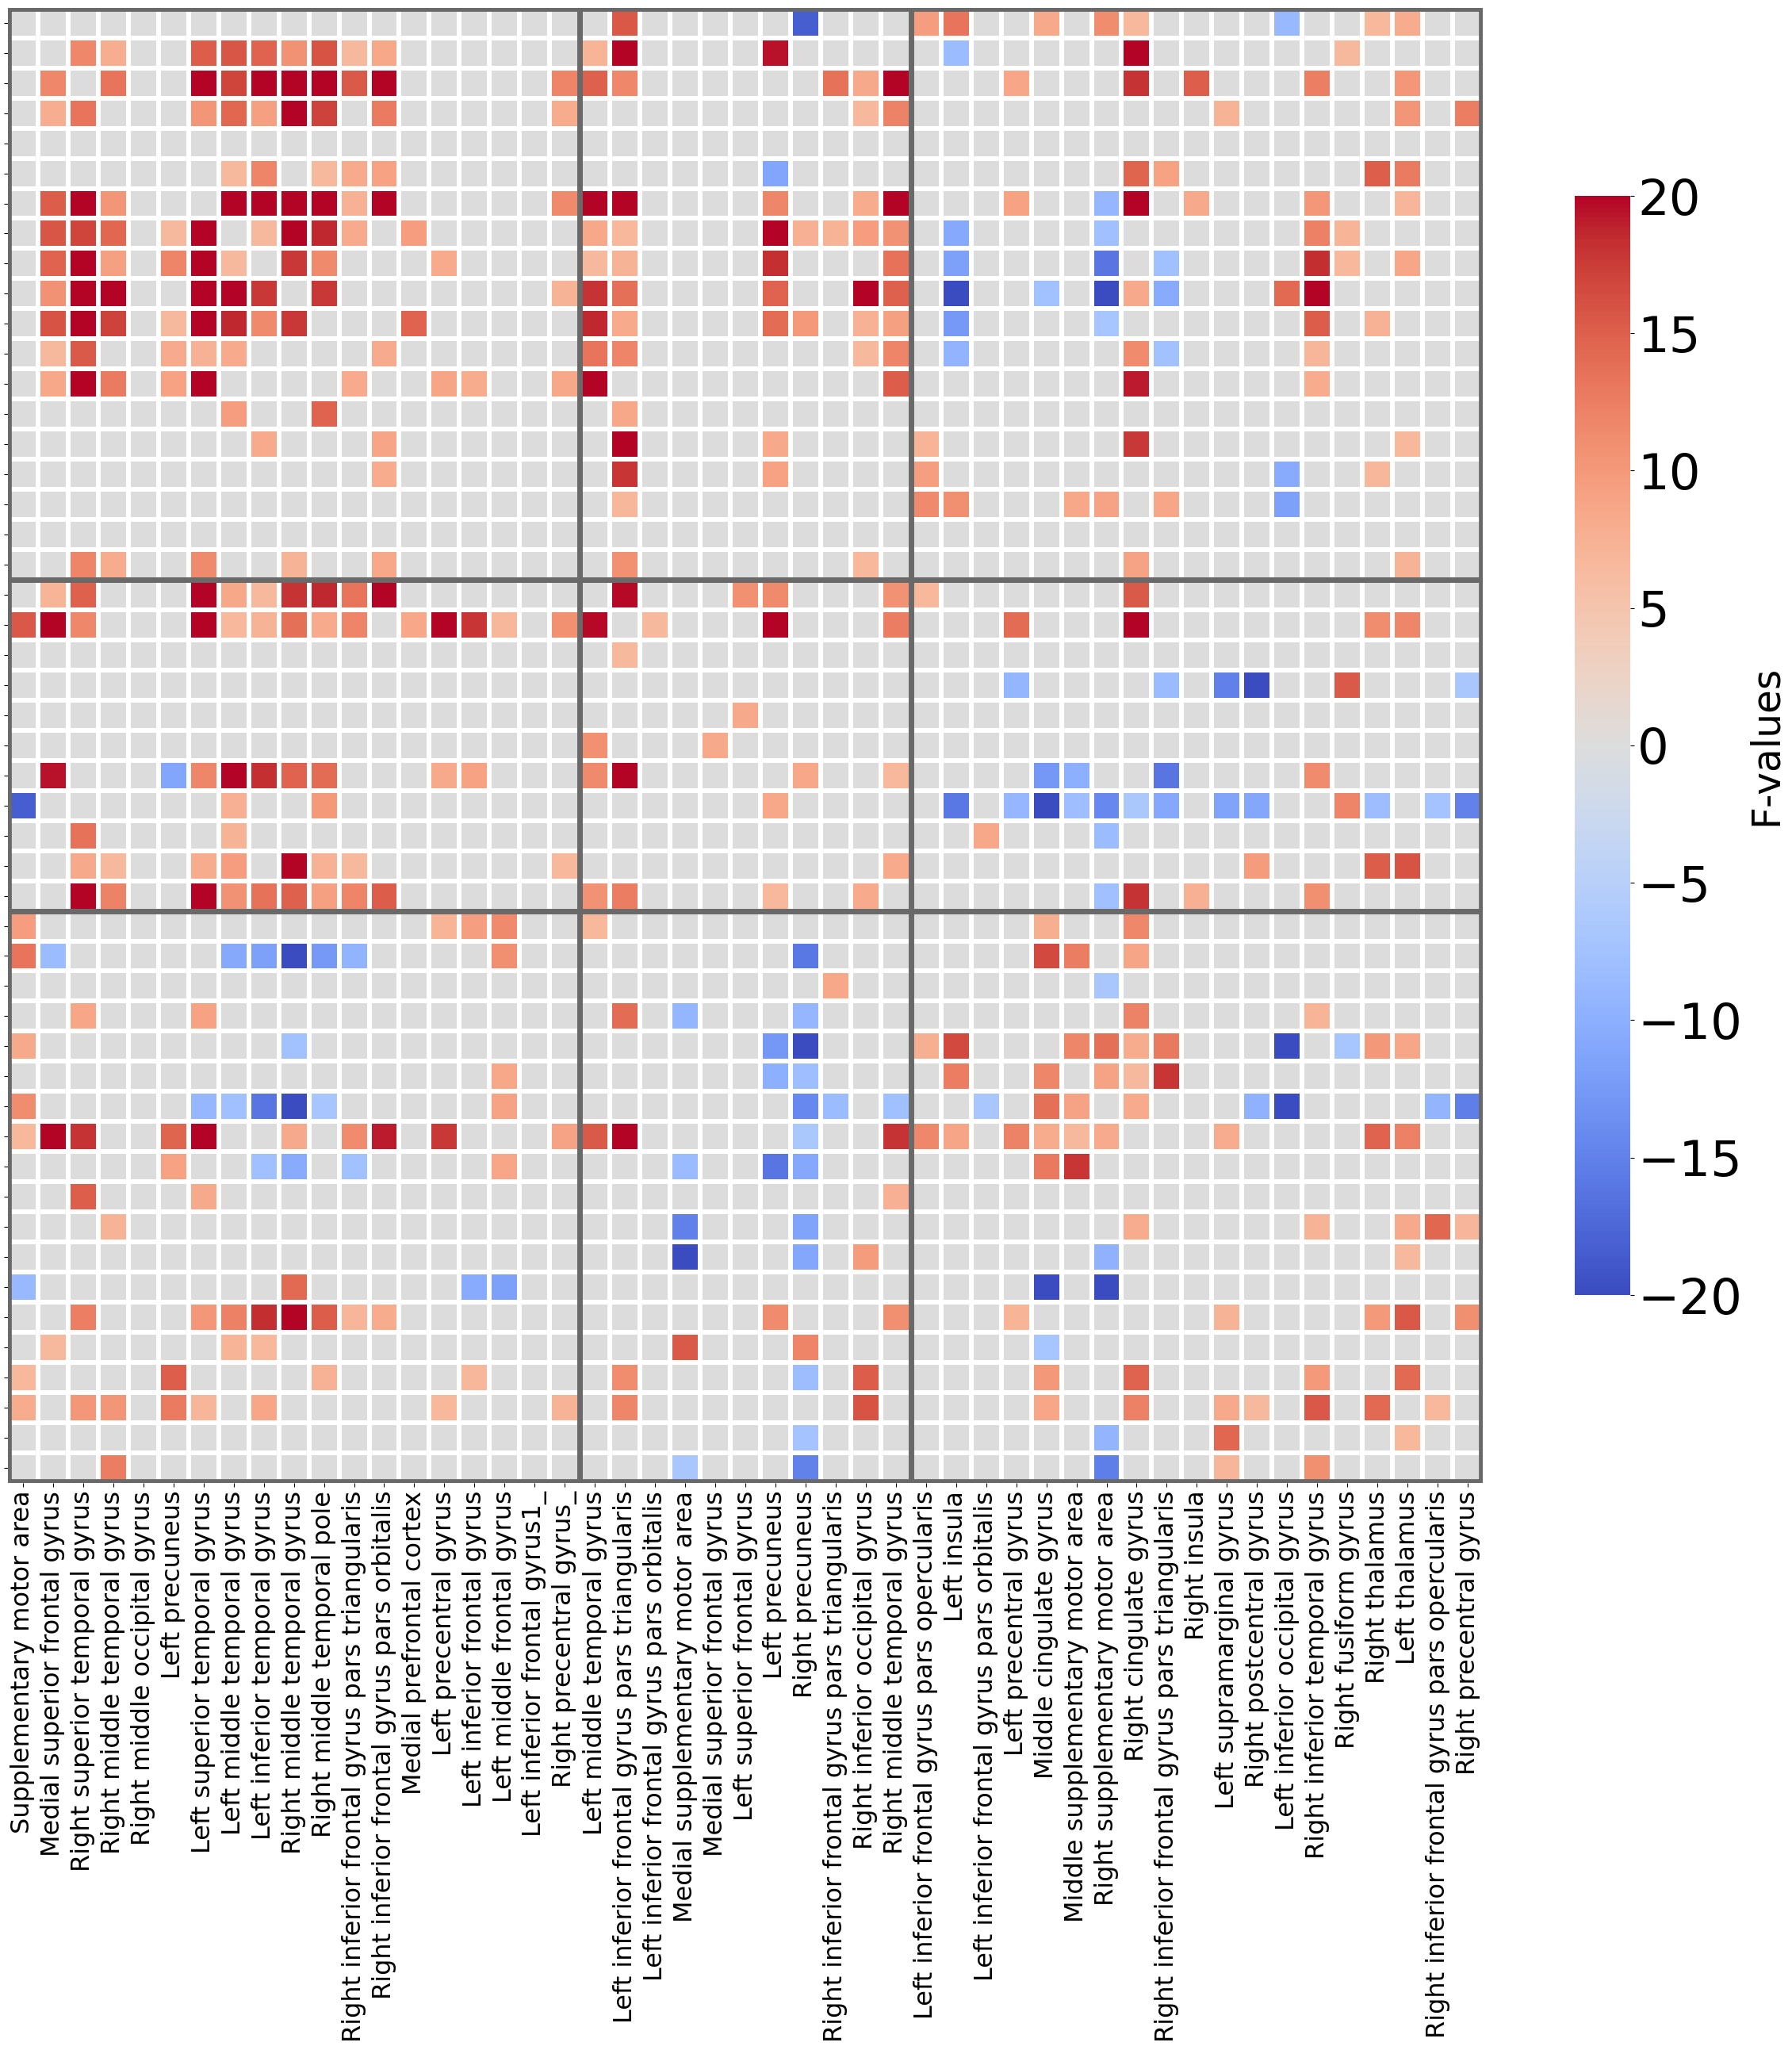

In [120]:
df_ttest = pd.DataFrame(p_values_correctedF*F_statistics*signs,index = labels_T,columns = labels_T)
plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plot1 = sns.heatmap(df_ttest,cmap= "coolwarm", center = 0,linewidths = 3,square = True,cbar_kws={'shrink': 0.6},vmax=20,vmin=-20)
colorbar = plot1.collections[0].colorbar
colorbar.ax.tick_params(labelsize=45)
colorbar.set_label('F-values', fontsize=35)
plot1.set_xticklabels(plot1.get_xticklabels(), fontsize=23, rotation=90)
#plot1.set_xticklabels([])
plot1.set_yticklabels([])
plot1.set(ylabel="")
plot1.axhline( y = 0,color = "dimgray",linewidth=7)
plot1.axhline( y = 49,color = "dimgray",linewidth=7)
plot1.axvline( x = 0,color = "dimgray",linewidth=7)
plot1.axvline( x = 49,color = "dimgray",linewidth=7)

plot1.axhline( y = 19,color = "dimgray",linewidth=5)
plot1.axvline( x = 19,color = "dimgray",linewidth=5)


plot1.axhline( y = 30,color = "dimgray",linewidth=5)
plot1.axvline( x = 30,color = "dimgray",linewidth=5)
#plot1.set_ylabel('  Empathy                            Affective ToM                             Cognitive ToM  ', fontsize=25)
plot1.yaxis.set_label_position('right')
#plt.title("Age bin 1-Age bin 4", fontsize=30,pad='20')
#plt.savefig("/Users/sarasaljoughi/Library/CloudStorage/OneDrive-OntarioTechUniversity/Documents/project1/Figures/Fig/ANCOVAAge bin1vs4_cleaned.png")

### Within Cognitive ToM

In [78]:
ff = p_values_correctedF*F_statistics*signs
color1 = sns.color_palette("husl", 3)
ff_clipped = np.clip(ff, -20, 20) 
view = plotting.view_connectome(ff_clipped[0:19,0:19], Cog_ToM_coords,edge_cmap = "coolwarm",edge_threshold= 10,linewidth = 8,node_size = 5)
view

### Within Affective ToM

In [79]:
view = plotting.view_connectome(ff[19:30,19:30], Aff_ToM_coords,edge_cmap = "coolwarm",edge_threshold= 10,linewidth = 8,node_size = 5)
view

### Within Empathy

In [74]:
view = plotting.view_connectome(ff[30:,30:], Emp_coords,edge_cmap = "coolwarm",edge_threshold= 10,linewidth = 8,node_size = 5)
view

<Figure size 1000x1000 with 0 Axes>

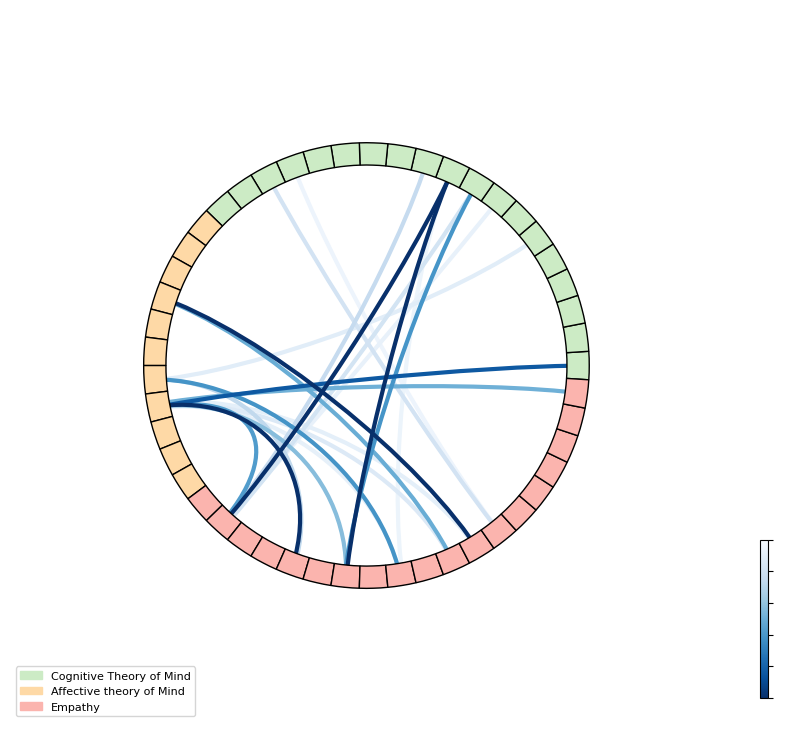

In [80]:
import mne
from mne_connectivity.viz import plot_connectivity_circle
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(10, 10),facecolor=(0, 0, 0, 0))
red_patch = mpatches.Patch(color='#ccebc5', label='Cognitive Theory of Mind')
blue_patch = mpatches.Patch(color='#fed9a6', label='Affective theory of Mind')
green_patch = mpatches.Patch(color='#fbb4ae', label='Empathy')


con = np.where(ff <-10, ff, np.nan)

con[np.ix_(range(0, 19), range(0, 19))] = np.nan  # Cognitive ToM
con[np.ix_(range(19, 30), range(19, 30))] = np.nan  # Affective ToM
con[np.ix_(range(30, 49), range(30, 49))] = np.nan  # Empathy

node_edgecolor = ['black']
node_colors = 19*['#ccebc5']+11*['#fed9a6']+19*['#fbb4ae']
fig,ax =plot_connectivity_circle(con,labels_T,node_colors=node_colors, colorbar = True ,padding=6,show=False,colormap='Blues_r',node_edgecolor=node_edgecolor,facecolor=(0, 0, 0, 0),textcolor=(0,0,0,0),node_linewidth = 1,linewidth=3,fontsize_names=2, vmin=-20, vmax=-10)
#fig,ax =plot_connectivity_circle(con,labels_T,node_colors=node_colors, colorbar = True ,padding=6,show=False,colormap='Reds',node_edgecolor=node_edgecolor,facecolor=(0, 0, 0, 0),textcolor='black',node_linewidth = 1,linewidth=3,fontsize_names=0)
ax.legend(handles=[red_patch, blue_patch, green_patch], loc=3,fontsize = 8)
#plt.savefig("/home/ssaljoughi/Downloads/negetive1-4.png")
plt.show()

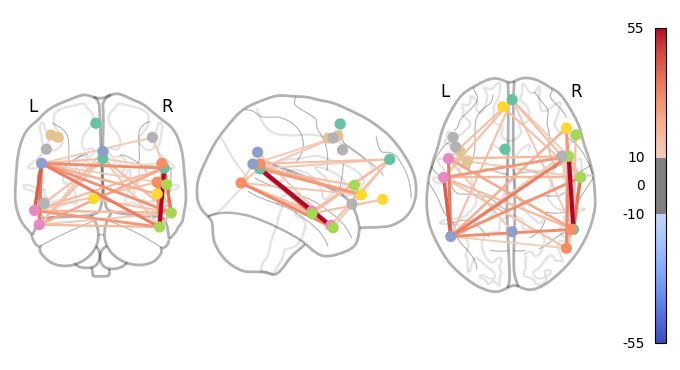

In [59]:
plot2 = plotting.plot_connectome(
    ff[0:19,0:19], Cog_ToM_coords,
    edge_cmap = "coolwarm",
    edge_threshold= 10,
    #title=" Social network,Age bin 1 vs 4",
    alpha = 0.3,
    colorbar = True
)
#plt.savefig("/imaging/ssaljoughi/Results/Connectome All bin1vs4.png")